In [ ]:
!pip install sastrawi -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import requests

In [ ]:
# load dataset into pandas
df = pd.read_csv('cleandatall.csv')
df.head(10)

,id,url,review
0,1,https://www.tokopedia.com/ca-shop/advan-nasa-p...,good
1,2,https://www.tokopedia.com/ca-shop/advan-nasa-p...,barang bagus memuaskan nicee...
2,3,https://www.tokopedia.com/ca-shop/advan-nasa-p...,"bagus, pengiriman cepat"
3,4,https://www.tokopedia.com/ca-shop/advan-nasa-p...,"respon cepet,pengeriman cepet ,barang okeh,man..."
4,5,https://www.tokopedia.com/ca-shop/advan-nasa-p...,"Mantap bergaransi resmi, spek sesuai"
5,6,https://www.tokopedia.com/ca-shop/advan-nasa-p...,makasih
6,7,https://www.tokopedia.com/ca-shop/advan-nasa-p...,"Makasih seller super duper gercep batt, semoga..."
7,8,https://www.tokopedia.com/ca-shop/advan-nasa-p...,muantap...barang sudah sampai...packaging oke ...
8,9,https://www.tokopedia.com/ca-shop/advan-nasa-p...,"Sesuai,Baru ada kartu garansi resmi,ada kwitan..."
9,10,https://www.tokopedia.com/ca-shop/advan-nasa-p...,produk original harga bershabat


In [ ]:
# check missing value
df.isnull().sum()

id          0
url         0
review    292
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

id        0
url       0
review    0
dtype: int64

In [ ]:
df.columns
df.describe()

,id
count,46873.000000
mean,23575.230260
std,13618.345547
min,1.000000
25%,11779.000000
50%,23571.000000
75%,35368.000000
max,47165.000000


In [ ]:
textdf = df.drop (['id','url'], axis = 1)
textdf.head()

,review
0,good
1,barang bagus memuaskan nicee...
2,"bagus, pengiriman cepat"
3,"respon cepet,pengeriman cepet ,barang okeh,man..."
4,"Mantap bergaransi resmi, spek sesuai"


# Preprocessing

Tahap ini melakukan langkah-langkah berikut:
- Cleaning text
- Lowercase
- Remove stopwords
- Stemming / lemmatization
- Tokenization

In [ ]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return ' '.join(text.split())

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl sm plg skrg
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stopwords: ['katakan', 'gwa', 'khusus', 'mungkinkah', 'diri']


In [ ]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [ ]:
# example
text = 'muantap...barang sudah sampai...packaging oke banget...seller fast respon...berfungsi dengan baik...makasih.'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
muantap...barang sudah sampai...packaging oke banget...seller fast respon...berfungsi dengan baik...makasih.

Cleaned text: 
muantap barang sudah sampai packaging oke banget seller fast respon berfungsi dengan baik makasih

Removed stopword: 
muantap packaging oke seller fast respon berfungsi makasih

Stemmed and lemmatized: 
muantap packaging oke seller fast respon fungsi makasih

Tokenized: 
['muantap', 'packaging', 'oke', 'seller', 'fast', 'respon', 'fungsi', 'makasih']


In [ ]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    #output = remove_stopword(output)

    # stemming and lemmatization
    #output = stemming_and_lemmatization(output)

    return output

In [ ]:
# test pipeline preprocess
text = 'Paking rapi. Fast delivery, barang ori. Sesuai gambar. Android 11. Memory 2 gb/32gb. Charging ok. Hanya tidak support otg flashdisk.'
preprocess(text)

'paking rapi fast delivery barang ori sesuai gambar android 11 memory 2 gb 32gb charging ok hanya tidak support otg flashdisk'

In [ ]:
# implement preprocessing
preprocessed_data = df.copy()
preprocessed_data['review'] = df['review'].map(preprocess)

In [ ]:
preprocessed_data.head(50)

,id,url,review
0,1,https://www.tokopedia.com/ca-shop/advan-nasa-p...,good
1,2,https://www.tokopedia.com/ca-shop/advan-nasa-p...,barang bagus memuaskan nicee
2,3,https://www.tokopedia.com/ca-shop/advan-nasa-p...,bagus pengiriman cepat
3,4,https://www.tokopedia.com/ca-shop/advan-nasa-p...,respon cepet pengeriman cepet barang okeh mantepp
4,5,https://www.tokopedia.com/ca-shop/advan-nasa-p...,mantap bergaransi resmi spek sesuai
5,6,https://www.tokopedia.com/ca-shop/advan-nasa-p...,makasih
6,7,https://www.tokopedia.com/ca-shop/advan-nasa-p...,makasih seller super duper gercep batt semoga ...
7,8,https://www.tokopedia.com/ca-shop/advan-nasa-p...,muantap barang sudah sampai packaging oke bang...
8,9,https://www.tokopedia.com/ca-shop/advan-nasa-p...,sesuai baru ada kartu garansi resmi ada kwitan...
9,10,https://www.tokopedia.com/ca-shop/advan-nasa-p...,produk original harga bershabat


In [ ]:
preprocessed_data['review'][11011]

NameError: ignored

Data sudah dilakukan preprocessing untuk keseluruhan.

Tahap berikutnya melakukan split dataset menjadi data train dan data test.

In [ ]:
preprocessed_data.to_csv('raw data clean.csv',index=False)

In [ ]:
textdf = preprocessed_data.drop (['id','url'], axis = 1)
textdf.head()

,review
0,good
1,barang bagus memuaskan nicee
2,bagus pengiriman cepat
3,respon cepet pengeriman cepet barang okeh mantepp
4,mantap bergaransi resmi spek sesuai


In [ ]:
textdf.to_csv('raw data clean review.csv',index=True)

## **DATA LABELLING**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pos_sent = open("/content/drive/MyDrive/mrhm/positive.txt").read()
positive_words=pos_sent.split('\n')

In [ ]:
neg_sent = open("/content/drive/MyDrive/mrhm/negative.txt").read()
negative_words=neg_sent.split('\n')

In [ ]:
textdf = pd.read_csv('/content/drive/MyDrive/mrhm/raw data clean no na.csv')
textdf.head()

,Unnamed: 0.1,Unnamed: 0,review,count,sentimen
0,0,0,good,1,positive
1,1,1,barang bagus memuaskan nicee,2,positive
2,2,2,bagus pengiriman cepat,2,positive
3,3,3,respon cepet pengeriman cepet barang okeh mantepp,2,positive
4,4,4,mantap bergaransi resmi spek sesuai,2,positive


In [ ]:
# Menghitung total hasil sentimen
sentimen_counts = textdf['sentimen'].value_counts()

# Menampilkan hasil
print(sentimen_counts)

positive    34734
neutral      9515
negative     2588
Name: sentimen, dtype: int64


In [ ]:
textdf['review'] = [str(fb) for fb in textdf['review']]

In [ ]:
textdf['count'] = textdf['review'].apply(lambda text: sum(0 + ((word in positive_words) and 1) + ((word in negative_words) and -1) for word in text.split()))

In [ ]:
textdf['sentimen'] = 'netral'
textdf['sentimen'][textdf['count']>0] = 'positive'
textdf['sentimen'][textdf['count']<0] = 'negative'
textdf['sentimen'][textdf['count']==0] = 'neutral'

<ipython-input-28-a035ba754481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textdf['sentimen'][textdf['count']>0] = 'positive'
<ipython-input-28-a035ba754481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textdf['sentimen'][textdf['count']<0] = 'negative'
<ipython-input-28-a035ba754481>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textdf['sentimen'][textdf['count']==0] = 'neutral'


In [ ]:
textdf.to_csv('raw data clean with label.csv',index=True)

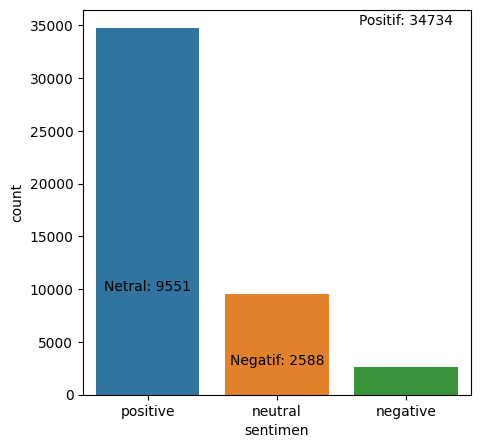

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat diagram countplot
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentimen', data=textdf)

# Hitung jumlah analisis sentimen netral, negatif, dan positif
count_netral = len(textdf[textdf['sentimen'] == 'neutral'])
count_negatif = len(textdf[textdf['sentimen'] == 'negative'])
count_positif = len(textdf[textdf['sentimen'] == 'positive'])

# Tambahkan teks di atas setiap batang diagram
plt.text(0, count_netral, f'Netral: {count_netral}', ha='center', va='bottom')
plt.text(1, count_negatif, f'Negatif: {count_negatif}', ha='center', va='bottom')
plt.text(2, count_positif, f'Positif: {count_positif}', ha='center', va='bottom')

# Tampilkan diagram
plt.show()


Text(0.5, 1.0, 'Distribution of sentiments')

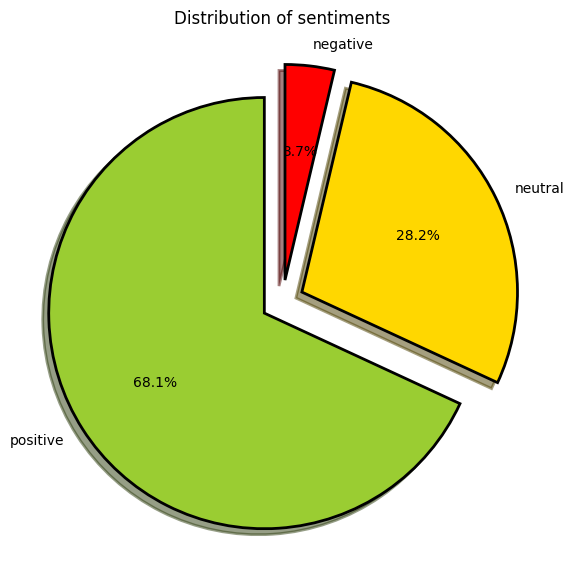

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = textdf['sentimen'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

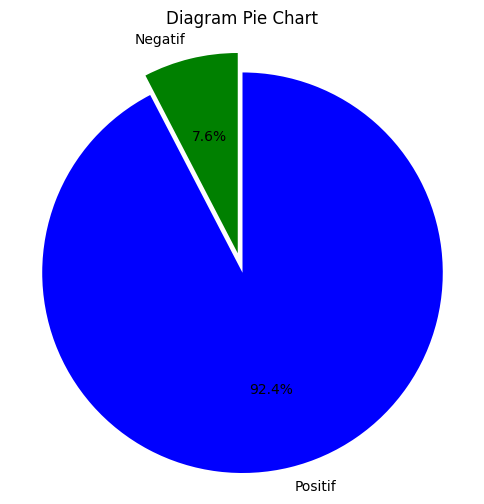

In [ ]:
# Hitung jumlah analisis sentimen negatif dan positif
# Hitung jumlah analisis sentimen negatif dan positif
count_negatif = len(textdf[textdf['sentimen'] == 'negatif'])
count_positif = len(textdf[textdf['sentimen'] == 'positif'])


# Data untuk pie chart
sizes = [count_negatif, count_positif]
labels = ['Negatif', 'Positif']
colors = ['green', 'blue']

# Explode bagian pertama (Negatif)
explode = (0.1, 0)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Tambahkan judul
plt.title('Diagram Pie Chart')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
textdf = textdf.drop(textdf[textdf['sentimen'] == 'netral'].index)
textdf

,review,count,sentimen
1,bagus muas nicee,1,positif
2,bagus kirim cepat,2,positif
6,makasih seller super duper gercep batt moga awet,1,positif
10,segel coba fungsi devicenya chargernya kartu g...,2,positif
12,segel warna order kirim cepat mantul,1,positif
...,...,...,...
47159,bagus kirim telat hari pake jne yes aneh tuh e...,1,positif
47160,packing aman seller responsif emas kirim super...,5,positif
47161,puas keren,1,positif
47162,barang original kemas segel spesifikasi garans...,1,positif


In [ ]:
textdf = textdf.reset_index()

In [ ]:
textdf

,index,review,count,sentimen
0,1,bagus muas nicee,1,positif
1,2,bagus kirim cepat,2,positif
2,6,makasih seller super duper gercep batt moga awet,1,positif
3,10,segel coba fungsi devicenya chargernya kartu g...,2,positif
4,12,segel warna order kirim cepat mantul,1,positif
...,...,...,...,...
26650,47159,bagus kirim telat hari pake jne yes aneh tuh e...,1,positif
26651,47160,packing aman seller responsif emas kirim super...,5,positif
26652,47161,puas keren,1,positif
26653,47162,barang original kemas segel spesifikasi garans...,1,positif


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
data_negatif = textdf[textdf['sentimen'] == 'negatif']
data_positif = textdf[textdf['sentimen'] == 'positif']

# Membuat TDM untuk sentimen negatif
vectorizer = CountVectorizer()
tdm_negatif = vectorizer.fit_transform(data_negatif['review'])
tdm_positif = vectorizer.transform(data_positif['review'])

ValueError: ignored

Term Kata Teratas untuk Sentimen Negatif:
             word  freq
1586      lengkap   794
2490        segel   587
317        barang   522
2029     original   501
1020      garansi   427
1433        kirim   378
2168        pesan   357
2358        resmi   356
1380        kemas   332
2659  spesifikasi   320


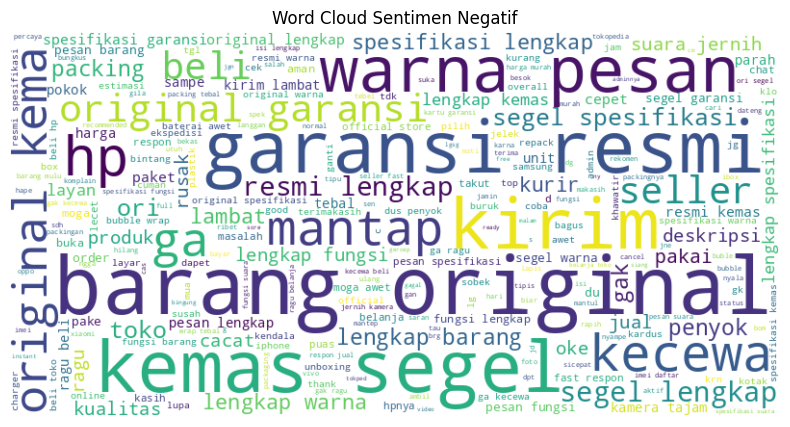

In [ ]:
# Mengambil daftar term kata dari vectorizer
terms_negatif = vectorizer.get_feature_names_out()

# Menghitung frekuensi negatif term kata di TDM
freq_negatif = tdm_negatif.sum(axis=0).A1

# Membuat DataFrame untuk term kata dan frekuensi negatif
df_negatif = pd.DataFrame({'word': terms_negatif, 'freq': freq_negatif})
df_negatif = df_negatif.sort_values(by='freq', ascending=False)

# Menampilkan 10 term kata teratas untuk negatif
print("Term Kata Teratas untuk Sentimen Negatif:")
print(df_negatif.head(10))
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white', max_words=250).generate(' '.join(data_negatif['review']))

# Tampilkan Word Cloud untuk Sentimen Negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()


Term Kata Teratas untuk Sentimen Positif:
          word  freq
584      cepat  8894
1433     kirim  7131
167       aman  7053
267      bagus  4909
2490     segel  4549
2789    terima  3824
2510    seller  3627
2029  original  3525
317     barang  3279
2168     pesan  3120


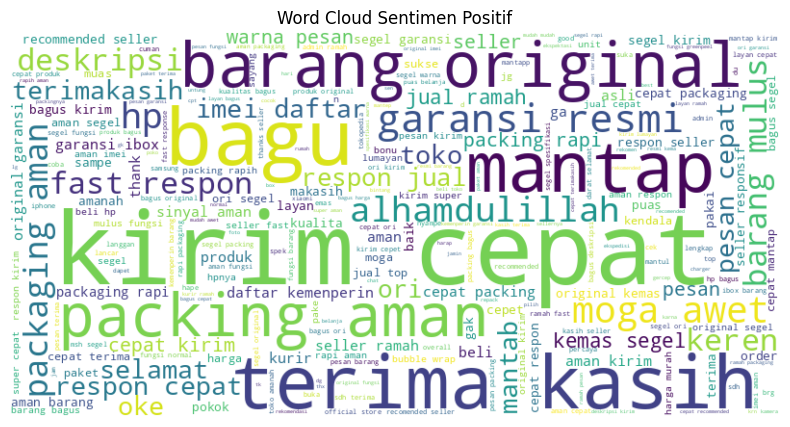

In [ ]:

# Mengambil daftar term kata dari vectorizer
terms_positif = vectorizer.get_feature_names_out()

# Menghitung frekuensi masing-masing term kata di TDM
freq_positif = tdm_positif.sum(axis=0).A1

# Membuat DataFrame untuk term kata dan frekuensi positif
df_positif = pd.DataFrame({'word': terms_positif, 'freq': freq_positif})

# Mengurutkan berdasarkan frekuensi
df_positif = df_positif.sort_values(by='freq', ascending=False)

# Menampilkan 10 term kata teratas untuk positif
print("\nTerm Kata Teratas untuk Sentimen Positif:")
print(df_positif.head(10))

wordcloud_positif = WordCloud(width=800, height=400, background_color='white', max_words=250).generate(' '.join(data_positif['review']))

# Tampilkan Word Cloud untuk Sentimen Positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

## **TF-IDF**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Menggunakan CountVectorizer untuk menghitung Term Frequency (TF)
vectorizer = CountVectorizer(max_df=0.96)

# Menghitung TF
tf_matrix = vectorizer.fit_transform(textdf['review'])

# Mengonversi hasil TF menjadi DataFrame pandas
tf_df = pd.DataFrame(data=tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan hasil TF
print(tf_df)



       00  000  000mha  00nya  01  02  03  06  07  08  ...  z7x  zaman  zat  \
0       0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
1       0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
2       0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
3       0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
4       0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
...    ..  ...     ...    ...  ..  ..  ..  ..  ..  ..  ...  ...    ...  ...   
26650   0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
26651   0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
26652   0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
26653   0    0       0      0   0   0   0   0   0   0  ...    0      0    0   
26654   0    0       0      0   0   0   0   0   0   0  ...    0      0    0   

       zelalu  zeller  zet  zona  zonk  zoom  zuper

In [ ]:
# Mengurangi kata-kata yang jarang muncul dengan teknik removeSparseTerms
threshold = 0.04  # Sesuaikan dengan kebutuhan
selected_cols = (tf_matrix.mean(axis=0).A1 > threshold)
adtm = tf_matrix[:, selected_cols]

# Mengonversi hasil ADTM menjadi DataFrame pandas
adtm_df = pd.DataFrame(data=adtm.toarray(), columns=vectorizer.get_feature_names_out()[selected_cols])

# Menampilkan hasil ADTM
print(adtm_df)

# Gabungkan hasil ADTM dengan kolom 'A', 'B', 'C' dari data asli
result_df = pd.concat([textdf[['review', 'count','sentimen']], adtm_df], axis=1)

# Tampilkan hasil akhir
print(result_df)

       alhamdulillah  aman  awet  bagus  barang  beli  cepat  deskripsi  fast  \
0                  0     0     0      1       0     0      0          0     0   
1                  0     0     0      1       0     0      1          0     0   
2                  0     0     1      0       0     0      0          0     0   
3                  0     1     0      1       0     0      0          0     0   
4                  0     0     0      0       0     0      1          0     0   
...              ...   ...   ...    ...     ...   ...    ...        ...   ...   
26650              0     0     0      1       0     0      0          0     0   
26651              0     1     0      0       0     0      1          0     0   
26652              0     0     0      0       0     0      0          0     0   
26653              0     0     0      0       2     0      0          0     0   
26654              0     0     0      1       0     0      1          0     0   

       fungsi  ...  ramah  

In [ ]:
# Mengambil daftar term (kata) dari vectorizer
terms = vectorizer.get_feature_names_out()[selected_cols]

# Menampilkan daftar term
print(terms)

['alhamdulillah' 'aman' 'awet' 'bagus' 'barang' 'beli' 'cepat' 'deskripsi'
 'fast' 'fungsi' 'garansi' 'harga' 'hp' 'imei' 'jual' 'kasih' 'kemas'
 'kirim' 'layan' 'lengkap' 'mantap' 'moga' 'mulus' 'ori' 'original'
 'packaging' 'packing' 'pesan' 'produk' 'ramah' 'rapi' 'resmi' 'respon'
 'segel' 'selamat' 'seller' 'terima' 'toko' 'warna']


## **NBC**

In [ ]:
#pemanggilan data mentah
data = result_df
data.head

<bound method NDFrame.head of                                                   review  count sentimen  \
0                                       bagus muas nicee      1  positif   
1                                      bagus kirim cepat      2  positif   
2       makasih seller super duper gercep batt moga awet      1  positif   
3      segel coba fungsi devicenya chargernya kartu g...      2  positif   
4                   segel warna order kirim cepat mantul      1  positif   
...                                                  ...    ...      ...   
26650  bagus kirim telat hari pake jne yes aneh tuh e...      1  positif   
26651  packing aman seller responsif emas kirim super...      5  positif   
26652                                         puas keren      1  positif   
26653  barang original kemas segel spesifikasi garans...      1  positif   
26654                               bagus original cepat      2  positif   

       alhamdulillah  aman  awet  bagus  barang  beli  ce

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()
data['sentimen'] = lE.fit_transform(data['sentimen'])
data

,review,count,sentimen,alhamdulillah,aman,awet,bagus,barang,beli,cepat,...,ramah,rapi,resmi,respon,segel,selamat,seller,terima,toko,warna
0,bagus muas nicee,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bagus kirim cepat,2,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,makasih seller super duper gercep batt moga awet,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,segel coba fungsi devicenya chargernya kartu g...,2,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,segel warna order kirim cepat mantul,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26650,bagus kirim telat hari pake jne yes aneh tuh e...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26651,packing aman seller responsif emas kirim super...,5,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
26652,puas keren,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26653,barang original kemas segel spesifikasi garans...,1,1,0,0,0,0,2,0,0,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
#spliting 80:20 text.klasifikasi
from sklearn.model_selection import train_test_split
X= data[['alhamdulillah', 'aman', 'awet', 'bagus', 'barang', 'beli', 'cepat', 'deskripsi',
 'fast', 'fungsi', 'garansi', 'harga', 'hp', 'imei', 'jual', 'kasih', 'kirim',
 'layan', 'lengkap', 'mantap', 'moga', 'mulus', 'ori', 'original', 'packaging',
 'packing', 'pesan', 'produk', 'ramah', 'rapi', 'resmi', 'respon', 'segel',
 'selamat', 'seller', 'terima', 'toko']].values
y= data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #menggunakan argumen shuffle=false untuk data akan dibagi secara berurutan tanpa pengacakan.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Melatih model Naive Bayes dengan data pelatihan
model_nb.fit(X_train, y_train)

# Akurasi pelatihan
accuracy_training = model_nb.score(X_train, y_train)
print("Akurasi training:", accuracy_training)

# Menguji model Naive Bayes pada data pengujian
y_pred_nb = model_nb.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_nb))

# Menampilkan matriks kebingungan (confusion matrix)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Menghitung AUC Score
roc_auc = roc_auc_score(y_test, y_pred_nb)
print('(Test set) AUC Score:', roc_auc)

Akurasi training: 0.8651753892327894
              precision    recall  f1-score   support

           0       0.33      0.89      0.48       371
           1       0.99      0.87      0.92      4960

    accuracy                           0.87      5331
   macro avg       0.66      0.88      0.70      5331
weighted avg       0.94      0.87      0.89      5331

Confusion Matrix:
 [[ 329   42]
 [ 664 4296]]
(Test set) AUC Score: 0.8764607425441266


## **NYOBA SVM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #untuk splitting data
from sklearn import metrics #untuk mengukur performa model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
get_ipython().run_line_magic('matplotlib', 'inline')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#model svm training
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
accuracy_training = model_svm.score(X_train, y_train)
print("Akurasi training:", accuracy_training)

from sklearn.metrics import confusion_matrix, roc_auc_score

#model svm testing
model_svm = svm.SVC(kernel = 'rbf')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print (metrics.confusion_matrix(y_test, y_pred_svm))
print('(Test set) AUC Score:', roc_auc_score(y_test, model_svm.predict(X_test)))

Akurasi training: 0.9467735884449446
              precision    recall  f1-score   support

           0       0.96      0.34      0.50       371
           1       0.95      1.00      0.98      4960

    accuracy                           0.95      5331
   macro avg       0.96      0.67      0.74      5331
weighted avg       0.95      0.95      0.94      5331

[[ 127  244]
 [   5 4955]]
(Test set) AUC Score: 0.6706549973915312


## **TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Definisikan parameter yang akan dituning
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Buat objek GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Latih model NBC dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Melakukan prediksi pada data testing menggunakan model dengan parameter terbaik
predictions = grid_search.predict(X_test)

# Mengukur performa model setelah tuning
accuracy = accuracy_score(y_test, predictions)
print("Akurasi model NBC setelah tuning:", accuracy)

print("\nConfusion Matrix setelah tuning:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report setelah tuning:")
print(classification_report(y_test, predictions))

print('(Test set) AUC Score setelah tuning:', roc_auc_score(y_test, grid_search.predict(X_test)))

Parameter terbaik: {'alpha': 0.1}
Akurasi model NBC setelah tuning: 0.9407240667792159

Confusion Matrix setelah tuning:
[[ 131  240]
 [  76 4884]]

Classification Report setelah tuning:
              precision    recall  f1-score   support

           0       0.63      0.35      0.45       371
           1       0.95      0.98      0.97      4960

    accuracy                           0.94      5331
   macro avg       0.79      0.67      0.71      5331
weighted avg       0.93      0.94      0.93      5331

(Test set) AUC Score setelah tuning: 0.6688885749065299


In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
max_features = 5000
databaru= textdf['content'].astype(str)

#menambahkan ngram=(1,2) dst kalo mau pake pemisahan per 2 kata atau lebih
tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(databaru)
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = tfidf.fit_transform(databaru).toarray()


In [ ]:
X= tfidf_mat
Y= textdf['sentimen']

## **DATA SPLITTING**

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clasfc= MultinomialNB()
cl= clasfc.fit(X_train,Y_train)
Y_pred= cl.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[273,  23],
       [ 74, 166]])

In [ ]:
TP = 166
TN = 273
FP = 23
FN = 74

In [ ]:
accuracy= (TN+TP)/(TN+TP+FN+FP)
accuracy

0.8190298507462687

In [ ]:
precision= TP/(TP+FP)
precision

0.8783068783068783

In [ ]:
recall= TP/(TP+FN)
recall

0.6916666666666667

In [ ]:
f1meas= (2*precision*recall)/(precision+recall)
f1meas

0.7738927738927738

## **COBA LAGI LAIN**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
vectorizer= tfid(max_features=5000)       # using TfIdf to make words as features by making word vectors
x= vectorizer.fit_transform(textdf['content'])
y= textdf.sentimen

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state= 42)         # splitting data for cross validation


In [ ]:
from sklearn.naive_bayes import MultinomialNB        # using multiNomial Naive Bayes as classifier

clf= MultinomialNB()

clf.fit(x_train,y_train)
pred= clf.predict(x_test)
print(roc_auc_score(pred,y_test))

0.8514904645375792


In [ ]:
x.shape


(2679, 1333)